2.3980509630066646 [2]
2.008175186585198 [3]
4.942908731766664e-31 [4]
2.4031665729902127 [5]
2.0040955117891635 [2, 3]
0.0 [2, 4]
2.389790641544934 [2, 5]
1.8296632006258803e-31 [3, 4]
1.9940805033176174 [3, 5]
4.962558936301083e-31 [4, 5]
9.956873170585943e-31 [2, 3, 4]
1.9893730255359905 [2, 3, 5]
3.3510200758474564e-29 [2, 4, 5]
9.580258989911409e-29 [3, 4, 5]
5.162916677380705e-29 [2, 3, 4, 5]


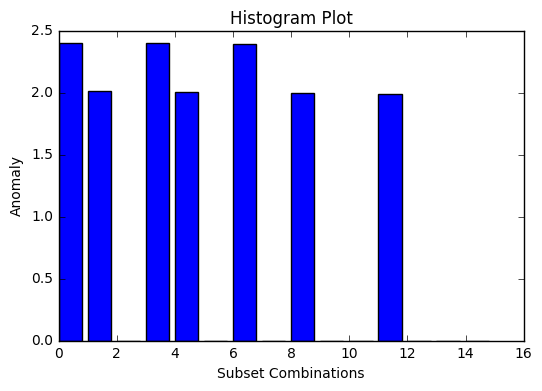

In [55]:
import csv
import numpy as nm
import matplotlib.pyplot as pt
import itertools
%matplotlib inline
from sklearn import linear_model
t=0
x=[]
a=[]
b=[]
#ch=int(input("enter a number between 2 to 5 except \n")) ####ch to store attributes data
with open('FDR.csv') as h:        #######load csv file
    r=csv.reader(h)
    for i in r:
        for j in i:
            if j=='NA' or j=='n/a':     #####load rows except NA & n/a
                t=1
        if t==0:    
            x.append(i)
        else:
            t=0
x.remove(x[0])
temp=[]
for i in range(0,len(x)):
    temp.append((float(x[i][2]), float(x[i][3]), float(x[i][4]), float(x[i][5])))   
for i in temp:
    a.append([i[0],i[1],i[2],i[3]])
    b.append(float(i[2]))  
lis=[]
stuff=[2,3,4,5]
for l in range(0,len(stuff)+1):
    for subset in itertools.combinations(stuff,l):
            lis.append(list(subset))
lis.remove(lis[0])
an=[]
p=[ ]
error=[]
for k in lis:
    for i in range(0,len(x)):
        for j in k:
            if j==2:
                p.append(a[i][0])
            if j==3:
                p.append(a[i][1])
            if j==4:
                p.append(a[i][2])
            if j==5:
                p.append(a[i][3])            
        an.append(p)
        p=[]
    an=nm.matrix(an)
    

    reg_model = linear_model.LinearRegression()
############### training of data using fit ##########
    reg_model.fit(an,b)
############### pred is used to predict the points of test data #####
    pred = reg_model.predict(an)

    pos,neg=0,0
    ans=0.0 
    for i in range (0,len(pred)):
            pos+=pow(pred[i]-b[i],2)
            ans=float(pos)/len(pred)

    print (ans,k)
    error.append(ans)
    
    
    #print reg_model.coef_
    an=[]
for i in range(0,len(lis)):    
    pt.bar(i,error[i])
    pt.xlabel("Subset Combinations")
    pt.ylabel("Anomaly")
    pt.title("Histogram Plot")